In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["NIO", "WKHS", "TSLA"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

NIO                                      TSLA  \
                            open   high    low  close     volume      open   
2020-10-30 00:00:00-04:00  31.39  31.59  30.03  30.57  261574283  406.8954   

                                                                WKHS         \
                               high     low   close    volume   open   high   
2020-10-30 00:00:00-04:00  407.5915  379.11  388.04  40305209  17.02  17.04   

                                                   
                             low  close    volume  
2020-10-30 00:00:00-04:00  15.13  15.38  15434107

In [6]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-31", tz="America/New_York").isoformat()

In [7]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

NIO                                     TSLA  \
                           open    high    low   close    volume    open   
2019-01-02 00:00:00-05:00  6.13  6.2400  6.000  6.2050   8339198  306.50   
2019-01-03 00:00:00-05:00  6.10  6.1454  6.020  6.0550   6316673  307.00   
2019-01-04 00:00:00-05:00  6.19  6.4000  6.130  6.3400   8818858  306.00   
2019-01-07 00:00:00-05:00  6.41  6.5850  6.310  6.5000   9222915  321.66   
2019-01-08 00:00:00-05:00  6.57  6.5800  6.165  6.3990   9207141  341.98   
2019-01-09 00:00:00-05:00  6.41  6.6900  6.350  6.6200  10606823  335.50   
2019-01-10 00:00:00-05:00  6.63  6.7300  6.410  6.6650   9592003  334.40   
2019-01-11 00:00:00-05:00  6.50  6.6150  6.480  6.5816   6626062  342.09   
2019-01-14 00:00:00-05:00  6.51  7.1500  6.370  6.7700  19131104  342.50   
2019-01-15 00:00:00-05:00  6.85  7.0700  6.750  6.8400  11449718  335.00   

                                                                     WKHS  \
                               high       low     close    volume    open   
2019-01-02 00:00:00-05:00  315.1300  298.8000  309.8699  10751296  0.5700   
2019-01-03 00:00:00-05:00  309.4000  297.3800  300.3100   6672221  0.6700   
2019-01-04 00:00:00-05:00  318.0000  302.7300  317.5400   6983846  0.7665   
2019-01-07 00:00:00-05:00  336.7400  317.7508  334.9860   7193888  0.8000   
2019-01-08 00:00:00-05:00  344.0100  327.0200  335.4900   6567180  0.7900   
2019-01-09 00:00:00-05:00  343.5025  331.4700  338.5200   5199244  0.7700   
2019-01-10 00:00:00-05:00  345.3900  331.7900  344.9100   5719942  0.7315   
2019-01-11 00:00:00-05:00  348.4100  338.7700  347.3500   4796324  0.7101   
2019-01-14 00:00:00-05:00  342.5000  334.0000  334.7000   5009149  0.8000   
2019-01-15 00:00:00-05:00  348.8000  334.5000  344.3450   5803044  0.8000   

                                                             
                             high     low   close    volume  
2019-01-02 00:00:00-05:00  0.7100  0.5545  0.6501  534006.0  
2019-01-03 00:00:00-05:00  0.7300  0.6600  0.6950  319398.0  
2019-01-04 00:00:00-05:00  0.7990  0.7500  0.7990  448176.0  
2019-01-07 00:00:00-05:00  0.8000  0.7600  0.7800  126486.0  
2019-01-08 00:00:00-05:00  0.7900  0.7400  0.7599  151570.0  
2019-01-09 00:00:00-05:00  0.7790  0.7400  0.7466  111366.0  
2019-01-10 00:00:00-05:00  0.7423  0.7031  0.7100   97576.0  
2019-01-11 00:00:00-05:00  0.7900  0.6900  0.7801  208087.0  
2019-01-14 00:00:00-05:00  0.8199  0.7500  0.7800  497417.0  
2019-01-15 00:00:00-05:00  0.8351  0.7800  0.8251  245630.0

In [8]:
# Check for null values
df_portfolio_year.isnull().sum()

NIO   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
WKHS  open      2
      high      2
      low       2
      close     2
      volume    2
dtype: int64

In [9]:
portfolio_year = df_portfolio_year.dropna().copy()

In [10]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["NIO"] = portfolio_year["NIO"]["close"]
df_closing_prices["WKHS"] = portfolio_year["WKHS"]["close"]
df_closing_prices["TSLA"] = portfolio_year["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,NIO,WKHS,TSLA
2019-01-02,6.2050,0.6501,309.8699
2019-01-03,6.0550,0.6950,300.3100
2019-01-04,6.3400,0.7990,317.5400
2019-01-07,6.5000,0.7800,334.9860
2019-01-08,6.3990,0.7599,335.4900
2019-01-09,6.6200,0.7466,338.5200
2019-01-10,6.6650,0.7100,344.9100
2019-01-11,6.5816,0.7801,347.3500
2019-01-14,6.7700,0.7800,334.7000
2019-01-15,6.8400,0.8251,344.3450


In [11]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

,NIO,WKHS,TSLA
2019-01-03,-0.024174,0.069066,-0.030851
2019-01-04,0.047069,0.149640,0.057374
2019-01-07,0.025237,-0.023780,0.054941
2019-01-08,-0.015538,-0.025769,0.001505
2019-01-09,0.034537,-0.017502,0.009032


In [12]:
df_daily_return.dtypes

NIO     float64
WKHS    float64
TSLA    float64
dtype: object

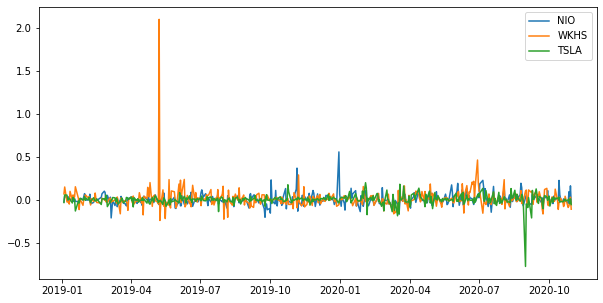

In [13]:
df_daily_return.plot(figsize=(10,5))

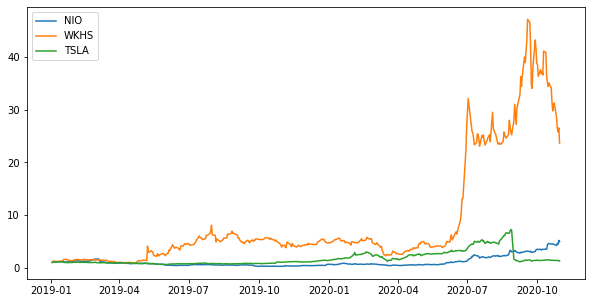

In [14]:
df_cumulative = (1 + df_daily_return).cumprod()
df_cumulative.plot(figsize=(10,5))

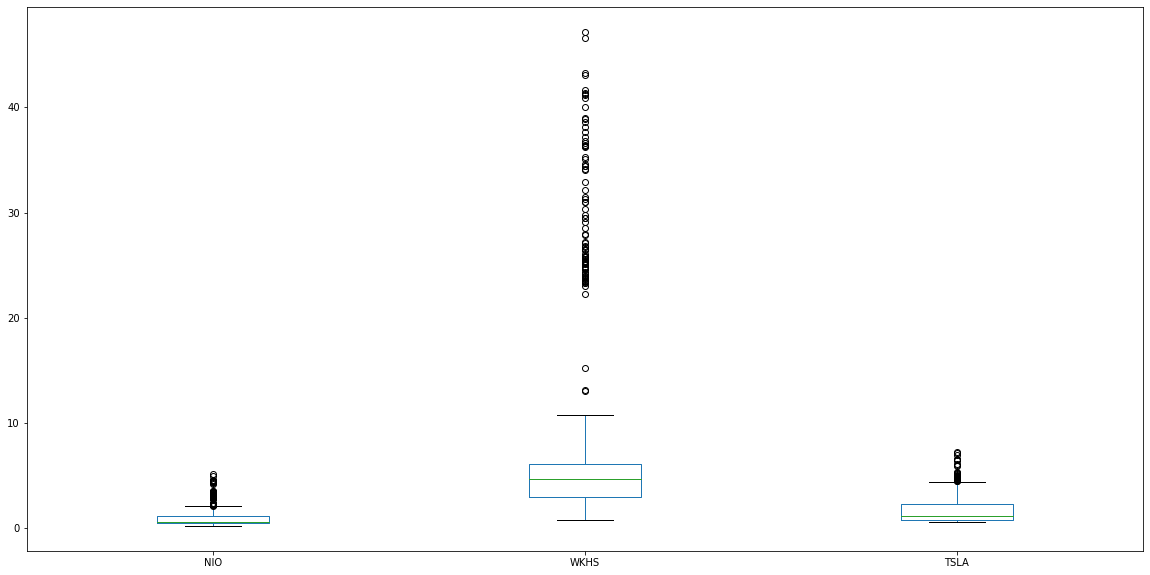

In [15]:
df_cumulative.plot.box(figsize=(20,10))

In [16]:
portfolio_std = df_daily_return.std().sort_values()
portfolio_std

TSLA    0.058555
NIO     0.066999
WKHS    0.122934
dtype: float64

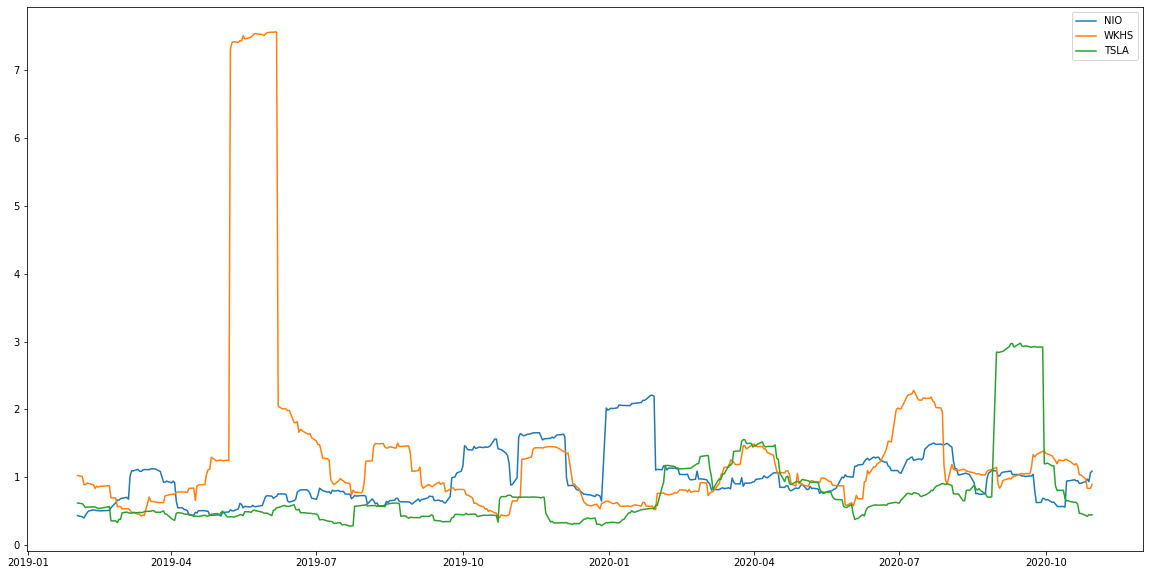

In [17]:
annualized_std = df_daily_return * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

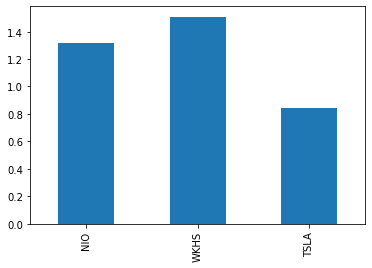

In [18]:
sharpe_ratios = (df_daily_return.mean() * 252) / (df_daily_return.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [19]:
###Format current date as ISO format
start = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-10-30", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "AMZN", "MSFT", "MRNA", "NVDA", "JPM", "GM", "F"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
best_stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

###Preview DataFrame
best_stocks_portfolio.head()

AAPL                                        \
                             open      high     low     close    volume   
2019-01-02 00:00:00-05:00  154.89  158.8500  154.23  157.5225  27803621   
2019-01-03 00:00:00-05:00  143.98  145.7200  142.00  142.2900  82418448   
2019-01-04 00:00:00-05:00  144.53  148.5499  143.80  148.1200  51267225   
2019-01-07 00:00:00-05:00  148.70  148.8300  145.90  147.9100  49982480   
2019-01-08 00:00:00-05:00  149.56  151.8200  148.52  150.6300  36592406   

                              AMZN                                         \
                              open     high        low     close   volume   
2019-01-02 00:00:00-05:00  1465.20  1553.36  1460.9300  1536.730  7132821   
2019-01-03 00:00:00-05:00  1520.01  1538.00  1498.1062  1502.070  6340704   
2019-01-04 00:00:00-05:00  1530.00  1594.00  1518.3100  1574.540  8285596   
2019-01-07 00:00:00-05:00  1602.31  1634.56  1589.1850  1631.120  7252880   
2019-01-08 00:00:00-05:00  1664.69  1676.61  1616.6100  1655.835  8184304   

                           ...    MSFT                                         \
                           ...    open      high       low    close    volume   
2019-01-02 00:00:00-05:00  ...   99.55  101.7500   98.9400  101.010  26692255   
2019-01-03 00:00:00-05:00  ...  100.00  100.1850   97.4000   97.500  34611003   
2019-01-04 00:00:00-05:00  ...   99.72  102.5100   98.9300  101.775  35976325   
2019-01-07 00:00:00-05:00  ...  101.64  103.2681  100.9800  102.150  28570376   
2019-01-08 00:00:00-05:00  ...  103.04  103.9700  101.7134  102.730  25193769   

                             NVDA                                      
                             open    high       low   close    volume  
2019-01-02 00:00:00-05:00  130.64  138.48  130.0500  136.00  10849501  
2019-01-03 00:00:00-05:00  133.79  135.16  127.6932  128.37  15496092  
2019-01-04 00:00:00-05:00  130.94  137.73  129.7000  135.85  13378304  
2019-01-07 00:00:00-05:00  138.50  144.89  136.4300  143.61  16318300  
2019-01-08 00:00:00-05:00  146.69  146.78  136.9000  139.60  18128834  

[5 rows x 40 columns]

In [20]:
# Create an empty DataFrame for closing prices
df_best_stocks = pd.DataFrame()

# Fetch the closing prices of stocks
df_best_stocks["AAPL"] = best_stocks_portfolio["AAPL"]["close"]
df_best_stocks["AMZN"] = best_stocks_portfolio["AMZN"]["close"]
df_best_stocks["MRNA"] = best_stocks_portfolio["MRNA"]["close"]
df_best_stocks["MSFT"] = best_stocks_portfolio["MSFT"]["close"]
df_best_stocks["NVDA"] = best_stocks_portfolio["NVDA"]["close"]
df_best_stocks["JPM"] = best_stocks_portfolio["JPM"]["close"]
df_best_stocks["GM"] = best_stocks_portfolio["GM"]["close"]
df_best_stocks["F"] = best_stocks_portfolio["F"]["close"]

# Drop the time component of the date
df_best_stocks.index = df_best_stocks.index.date

# Display sample data
df_best_stocks.head(10)

,AAPL,AMZN,MRNA,MSFT,NVDA,JPM,GM,F
2019-01-02,157.5225,1536.7300,15.290,101.010,136.000,99.1999,33.585,7.8950
2019-01-03,142.2900,1502.0700,15.510,97.500,128.370,97.3200,32.290,7.8000
2019-01-04,148.1200,1574.5400,16.975,101.775,135.850,100.6600,33.365,8.0750
2019-01-07,147.9100,1631.1200,16.350,102.150,143.610,100.8600,34.420,8.2999
2019-01-08,150.6300,1655.8350,16.950,102.730,139.600,100.4900,34.850,8.3750
2019-01-09,153.3700,1657.5900,16.270,104.250,142.590,100.2800,35.185,8.7200
2019-01-10,153.5500,1655.5000,16.485,103.570,145.300,100.3800,34.730,8.6800
2019-01-11,152.0534,1639.6600,16.960,102.810,148.910,100.0000,37.185,8.8150
2019-01-14,149.7600,1619.8767,16.740,102.120,150.745,100.9400,37.700,8.9950
2019-01-15,152.9500,1672.7500,16.610,104.780,149.500,101.6100,37.535,8.8350


In [21]:
# Check for null values
df_best_stocks.isnull().sum()

AAPL    0
AMZN    0
MRNA    0
MSFT    0
NVDA    0
JPM     0
GM      0
F       0
dtype: int64

In [22]:
##Join stocks
all_portfolios = pd.concat([df_best_stocks, df_closing_prices], axis="columns", join="inner")
all_portfolios.head()

,AAPL,AMZN,MRNA,MSFT,NVDA,JPM,GM,F,NIO,WKHS,TSLA
2019-01-02,157.5225,1536.730,15.290,101.010,136.00,99.1999,33.585,7.8950,6.205,0.6501,309.8699
2019-01-03,142.2900,1502.070,15.510,97.500,128.37,97.3200,32.290,7.8000,6.055,0.6950,300.3100
2019-01-04,148.1200,1574.540,16.975,101.775,135.85,100.6600,33.365,8.0750,6.340,0.7990,317.5400
2019-01-07,147.9100,1631.120,16.350,102.150,143.61,100.8600,34.420,8.2999,6.500,0.7800,334.9860
2019-01-08,150.6300,1655.835,16.950,102.730,139.60,100.4900,34.850,8.3750,6.399,0.7599,335.4900


In [23]:
all_daily_return = all_portfolios.pct_change().dropna().copy()
all_daily_return.tail()

,AAPL,AMZN,MRNA,MSFT,NVDA,JPM,GM,F,NIO,WKHS,TSLA
2020-10-26,0.000174,0.000836,-0.003262,-0.028253,-0.033029,-0.024846,-0.026880,-0.017136,-0.042342,-0.088496,-0.000796
2020-10-27,0.012776,0.025130,0.005692,0.014276,0.019148,-0.019060,-0.026507,-0.013699,0.093810,-0.071197,0.009972
2020-10-28,-0.046168,-0.038149,-0.069902,-0.048980,-0.057250,-0.027887,-0.022643,-0.025253,-0.032689,-0.027294,-0.043515
2020-10-29,0.030319,0.015905,0.083219,0.008288,0.030829,0.006214,0.022874,0.023316,0.162791,0.030448,0.011429
2020-10-30,-0.049074,-0.054986,-0.052247,-0.008856,-0.035026,0.009263,-0.010034,-0.022203,-0.044687,-0.108922,-0.055036


In [24]:
all_daily_return.describe()

,AAPL,AMZN,MRNA,MSFT,NVDA,JPM,GM,F,NIO,WKHS,TSLA
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,0.000828,0.001686,0.004533,0.001758,0.003367,0.000298,0.000500,0.000346,0.005573,0.011691,0.003108
std,0.042417,0.020280,0.051703,0.022090,0.032269,0.025440,0.029623,0.028282,0.066999,0.122934,0.058555
min,-0.741696,-0.078818,-0.180007,-0.147533,-0.183698,-0.149649,-0.156004,-0.111901,-0.210267,-0.239669,-0.774789
25%,-0.007745,-0.008220,-0.022975,-0.007604,-0.012046,-0.008873,-0.011867,-0.012212,-0.031502,-0.031671,-0.014681
50%,0.002634,0.002088,0.000148,0.002066,0.003614,0.000890,0.000828,-0.000672,0.000000,0.000000,0.003639
75%,0.014235,0.011254,0.028064,0.011451,0.019218,0.009502,0.012041,0.012559,0.032698,0.039773,0.023931
max,0.121210,0.078859,0.279634,0.144782,0.176135,0.179790,0.198751,0.229927,0.557851,2.100205,0.199545


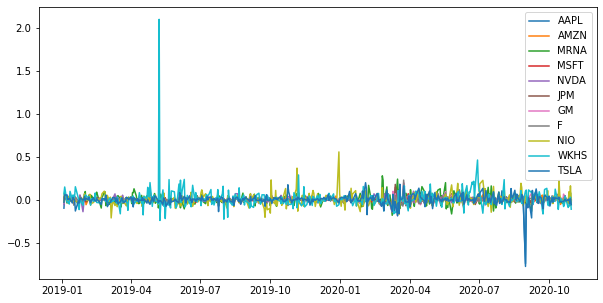

In [25]:
all_daily_return.plot(figsize=(10,5))

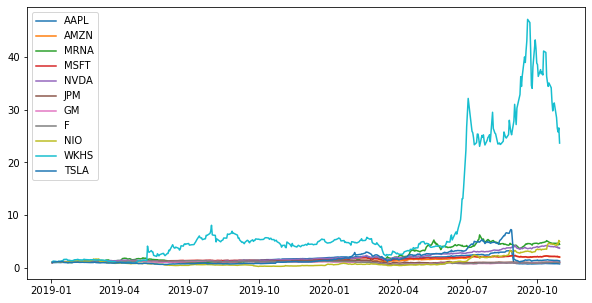

In [26]:
all_cumulative = (1 + all_daily_return).cumprod()
all_cumulative.plot(figsize=(10,5))

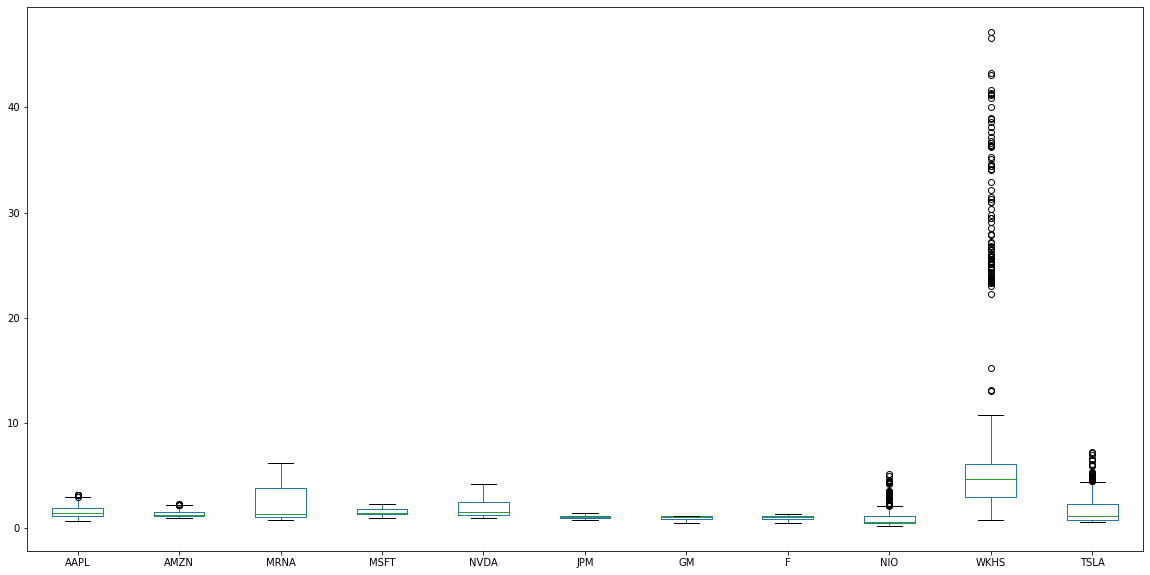

In [27]:
all_cumulative.plot.box(figsize=(20,10))

In [28]:
all_portfolio_std = all_daily_return.std().sort_values()
all_portfolio_std

AMZN    0.020280
MSFT    0.022090
JPM     0.025440
F       0.028282
GM      0.029623
NVDA    0.032269
AAPL    0.042417
MRNA    0.051703
TSLA    0.058555
NIO     0.066999
WKHS    0.122934
dtype: float64

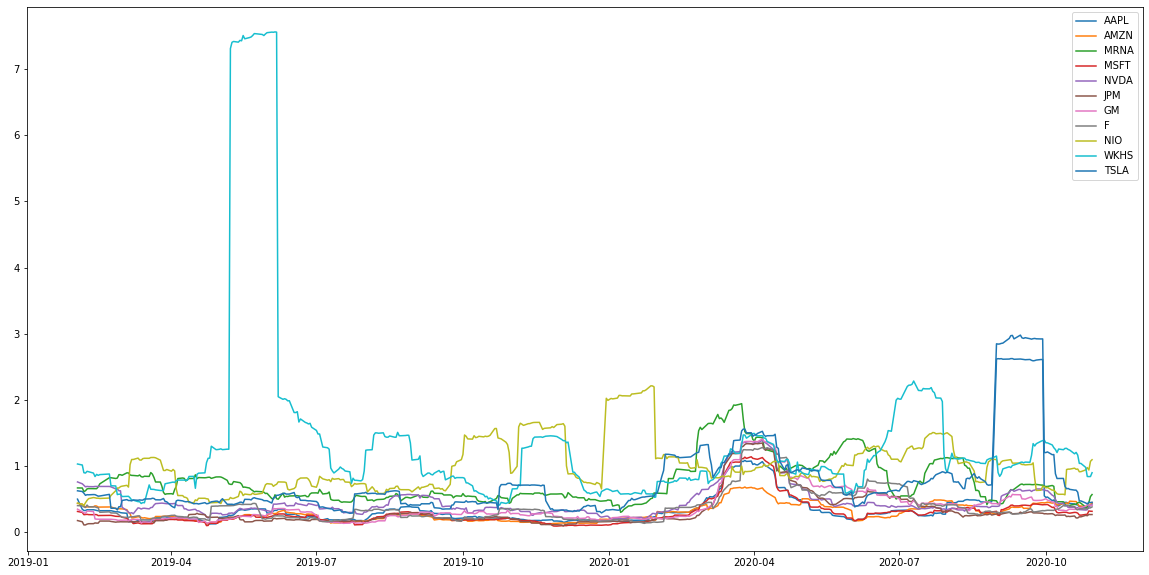

In [29]:
all_annualized_std = all_daily_return * np.sqrt(252)
all_annualized_std.rolling(window=21).std().plot(figsize=(20,10))

In [30]:
###Calculate and plot the correlation
all_correlation = all_portfolios.corr()
all_correlation

,AAPL,AMZN,MRNA,MSFT,NVDA,JPM,GM,F,NIO,WKHS,TSLA
AAPL,1.000000,0.288694,0.339333,0.465607,0.255295,0.072837,-0.474769,-0.371589,-0.147449,0.024533,0.839567
AMZN,0.288694,1.000000,0.933078,0.914392,0.961668,-0.438905,-0.522484,-0.523710,0.812498,0.887541,0.678276
MRNA,0.339333,0.933078,1.000000,0.858529,0.915565,-0.557182,-0.648344,-0.660838,0.728073,0.773107,0.704954
MSFT,0.465607,0.914392,0.858529,1.000000,0.936827,-0.209021,-0.612854,-0.587382,0.625534,0.786216,0.709386
NVDA,0.255295,0.961668,0.915565,0.936827,1.000000,-0.353380,-0.538503,-0.576481,0.821463,0.886415,0.627775
JPM,0.072837,-0.438905,-0.557182,-0.209021,-0.353380,1.000000,0.587168,0.645480,-0.386781,-0.313678,-0.278182
GM,-0.474769,-0.522484,-0.648344,-0.612854,-0.538503,0.587168,1.000000,0.933167,-0.164407,-0.305167,-0.607350
F,-0.371589,-0.523710,-0.660838,-0.587382,-0.576481,0.645480,0.933167,1.000000,-0.259194,-0.325003,-0.571819
NIO,-0.147449,0.812498,0.728073,0.625534,0.821463,-0.386781,-0.164407,-0.259194,1.000000,0.864336,0.340558
WKHS,0.024533,0.887541,0.773107,0.786216,0.886415,-0.313678,-0.305167,-0.325003,0.864336,1.000000,0.437471


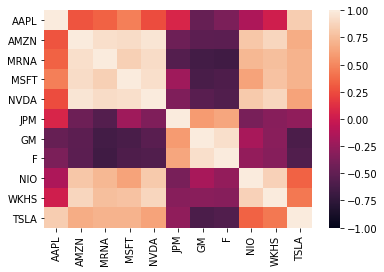

In [31]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

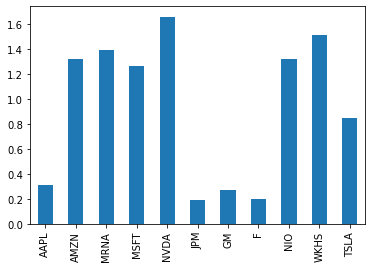

In [32]:
all_sharpe_ratios = (all_daily_return.mean() * 252) / (all_daily_return.std() * np.sqrt(252))
all_sharpe_ratios.plot(kind="bar")